# K-Means Project - No Supervised Learning

## Table of Contents
### Explore Data Analysis (EDA)

* [0. Problem Statement](#co)
* [1. Importing libraries](#c1)
* [2. Data Collection](#c2)
* [3. Exploration and Data Cleaning](#c3)
  * [3.1 Drop Duplicate Information](#c3-1)
  * [3.2 Drop Irrelevant Information](#c3-2)
* [4. Univariate Analysis](#c4)
  * [4.1 Dividing our dataset into categorical and numerical](#c4-1)
  * [4.2 Categorical Variable Analysis](#c4-2)
  * [4.3 Numerical Variable Analysis](#c4-3)
* [5. Multivariate Analysis](#c5)
  * [5.1 Encoding Categorical Values and Saving JSON Files](#c5-1)
  * [5.2 Numerical-Categorical Analysis](#c5-2)
* [6. Feature Engineering](#c6)
  * [6.1 New Feature Inference](#c6-1)
  * [6.2 Outliers Analysis](#c6-2)
  * [6.3 Missing Values Analysis](#c6-3)
  * [6.4 Split train/test of both Data Frames](#c6-4)
* [7. Data Processing](#c7)
  * [7.1 Normalization](#c7-1)
  * [7.2 Minmax Scalation](#c7-2)

### Machine Learning

* [8. Machine Learning](#c8)
  * [8.1 Which is the best dataset?](#c8-1)
  * [8.2 Model Optimization](#c8-2)
  * [8.3 Evaluation of the Model](#c8-3)

## 0. Problem Statement <a id='c0'></a>

The objective of this exercise is to conduct an in-depth EDA analysis and develop a no supervised K-means model to classify houses according to region and average income of California.

## 1. Importing libraries <a id='c1'></a>

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
import warnings
import pickle
from pickle import dump
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

## 2. Data Collection <a id='c2'></a>

In [112]:
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'

def get_data(URL:str) -> pd.DataFrame:
    total_data = pd.read_csv(URL, sep=',')
    total_data.head()
    return total_data

get_data(URL)
total_data = get_data(URL)
print(total_data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


## 3. Exploration and Data Cleaning <a id='c3'></a>

#### 3.1 Drop Null Values <a id='c3-1'></a>

Since there is no null values, we won't delete any data.

In [113]:
total_data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

#### 3.2 Drop Duplicate Information <a id='c3-2'></a>

Since there is duplicated rows we'll delete them

In [114]:
rows = total_data.shape[0]
duplicated_rows = total_data.duplicated().sum()
print(f'We have {duplicated_rows} rows of {rows}')

We have 0 rows of 20640


#### 3.3 Drop Irrelevant Information <a id='c3-3'></a>

In [115]:
important_columns = ['Latitude', 'Longitude', 'MedInc']
clean_data = total_data[important_columns]
print(clean_data.head())

   Latitude  Longitude  MedInc
0     37.88    -122.23  8.3252
1     37.86    -122.22  8.3014
2     37.85    -122.24  7.2574
3     37.85    -122.25  5.6431
4     37.85    -122.25  3.8462


## 4. Univariate Analysis <a id='c4'></a>

### 4.1 Dividing our dataset into categorical and numerical <a id='c4-1'></a>

As we can see, all the variables are numerical.

In [116]:
numerical_variables = clean_data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Variables:", numerical_variables)

categorical_variables = clean_data.select_dtypes(exclude=['number']).columns.tolist()
print("Categorical Variables:", categorical_variables)

print(total_data.dtypes)

Numerical Variables: ['Latitude', 'Longitude', 'MedInc']
Categorical Variables: []
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


### 4.2 Numerical Variable Analysis <a id='c4-2'></a>

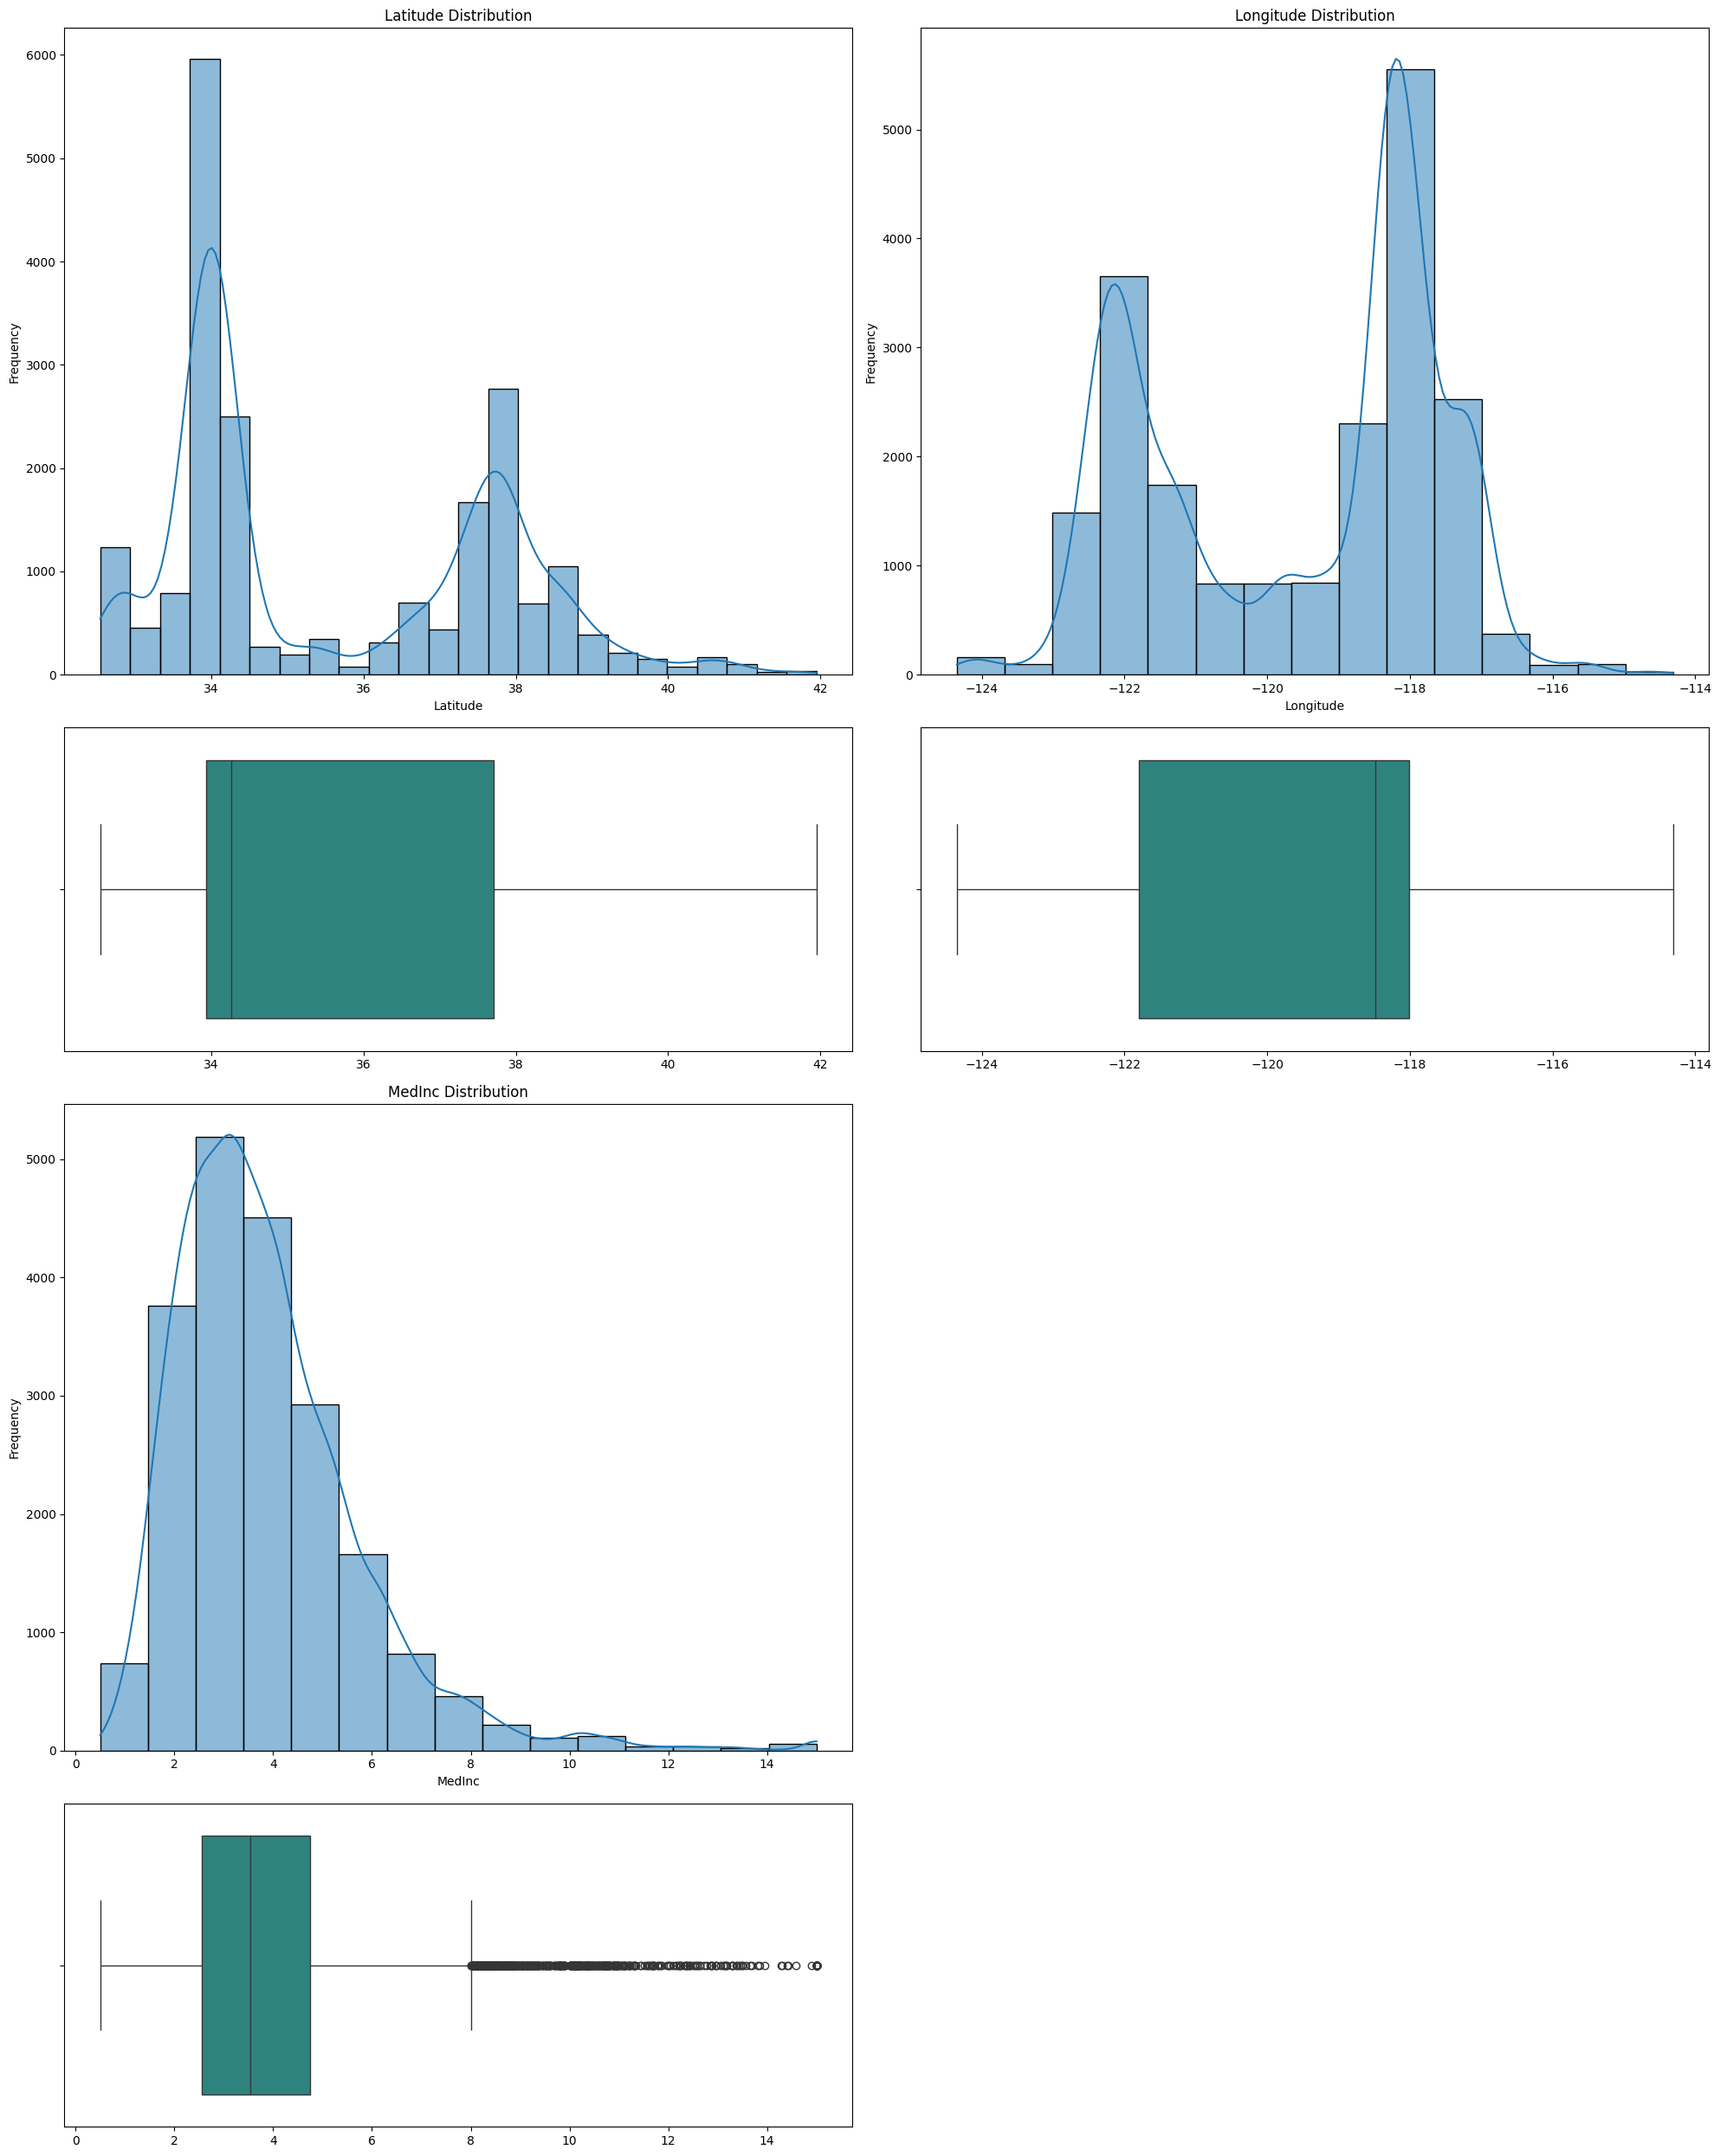

In [117]:
fig, axes = plt.subplots(
    nrows = 4,
    ncols= 2,
    figsize=(20, 25),
    gridspec_kw={"height_ratios": [4, 2, 4, 2]}
)

# --- Row 1, Column 1: 'Latitude' ---
# Histplot
sns.histplot(
    data=clean_data, x='Latitude', kde=True, bins=24, ax=axes[0, 0], palette="viridis"
)
axes[0, 0].set_title("Latitude Distribution", fontsize=12)
axes[0, 0].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=clean_data, x="Latitude", ax=axes[1, 0], palette="viridis")
axes[1, 0].tick_params(axis="y", labelleft=False)
axes[1, 0].set_xlabel('')


# --- Row 1, Column 2: 'Longitude' ---
# Histplot
sns.histplot(
    data=clean_data, x='Longitude', kde=True, bins=15, ax=axes[0, 1], palette="viridis"
)
axes[0, 1].set_title("Longitude Distribution", fontsize=12)
axes[0, 1].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=clean_data, x="Longitude", ax=axes[1, 1], palette="viridis")
axes[1, 1].tick_params(axis="y", labelleft=False)
axes[1, 1].set_xlabel('')


# --- Row 2, Column 1: 'MedInc' ---
# Histplot
sns.histplot(
    data=clean_data, x='MedInc', kde=True, bins=15, ax=axes[2, 0], palette="viridis"
)
axes[2, 0].set_title("MedInc Distribution", fontsize=12)
axes[2, 0].set_ylabel("Frequency", fontsize=10)

# Boxplot
sns.boxplot(data=clean_data, x="MedInc", ax=axes[3, 0], palette="viridis")
axes[3, 0].tick_params(axis="y", labelleft=False)
axes[3, 0].set_xlabel('')

fig.delaxes(axes[2,1])
fig.delaxes(axes[3,1])

plt.tight_layout()
plt.show()

**Conclusions:**

- **Latitude**: 
- **Longitude**: 
- **MedInc**: The distribution of this plot is right-skewed. The majority of individuals has a median income between 20000 and 50000$ anually income with a peak at 30000$. We can observe a high number of outliers at the right side of the plot.

## 5. Multivariate Analysis <a id='c5'></a>

### 5.1 Numerical-Numerical Analysis <a id='c5-1'></a>

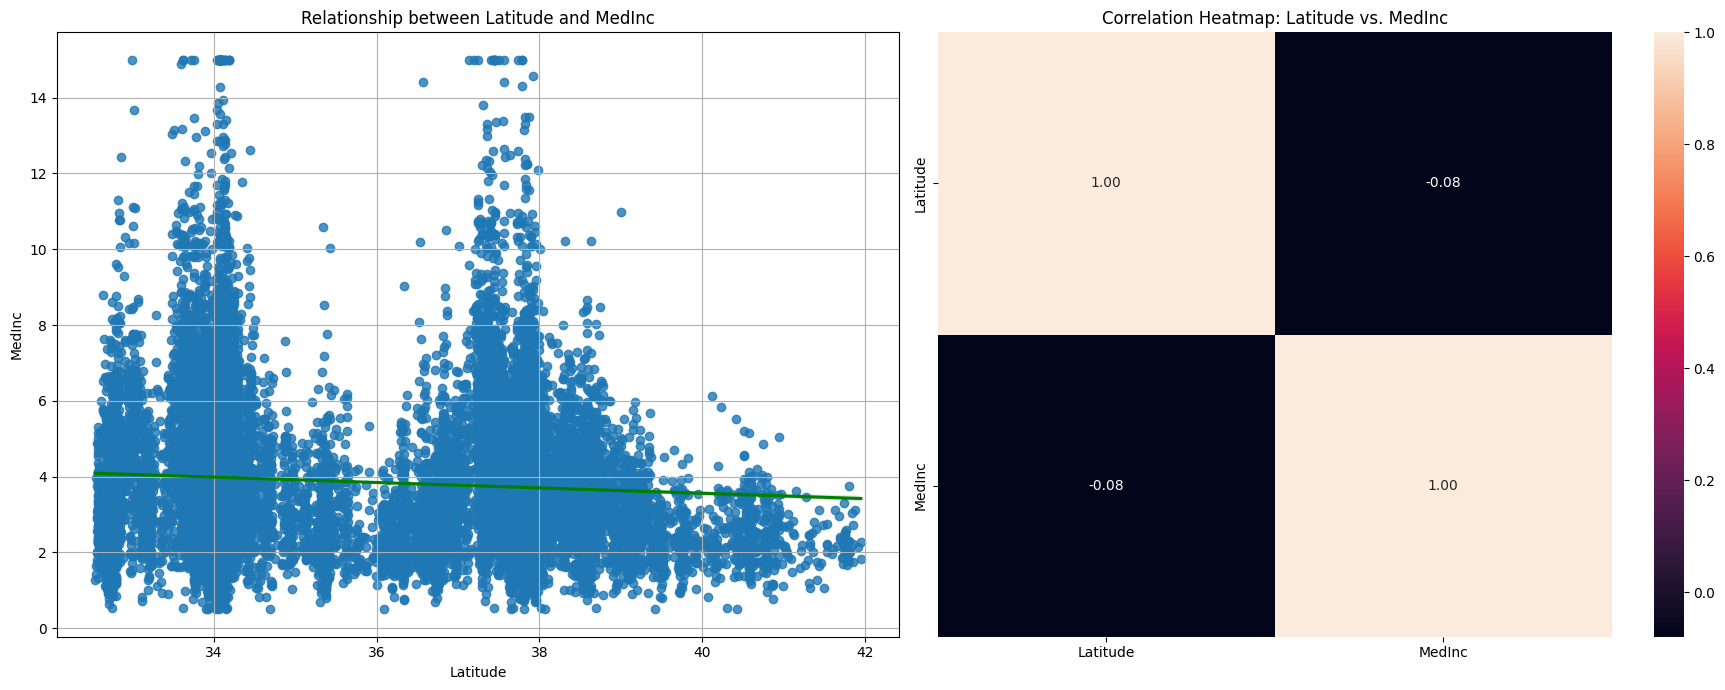

In [118]:
correlation_matrix_2_vars = clean_data[['Latitude', 'MedInc']].corr()
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- Subplot 1: regplot ---
sns.regplot(data=clean_data, x='Latitude', y='MedInc', ci=95, ax=axes[0], line_kws={'color': 'green'})
axes[0].set_title('Relationship between Latitude and MedInc')
axes[0].set_xlabel('Latitude')
axes[0].set_ylabel('MedInc')
axes[0].grid(True)

# --- Subplot 2: heatmap ---
sns.heatmap(correlation_matrix_2_vars, annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Heatmap: Latitude vs. MedInc')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

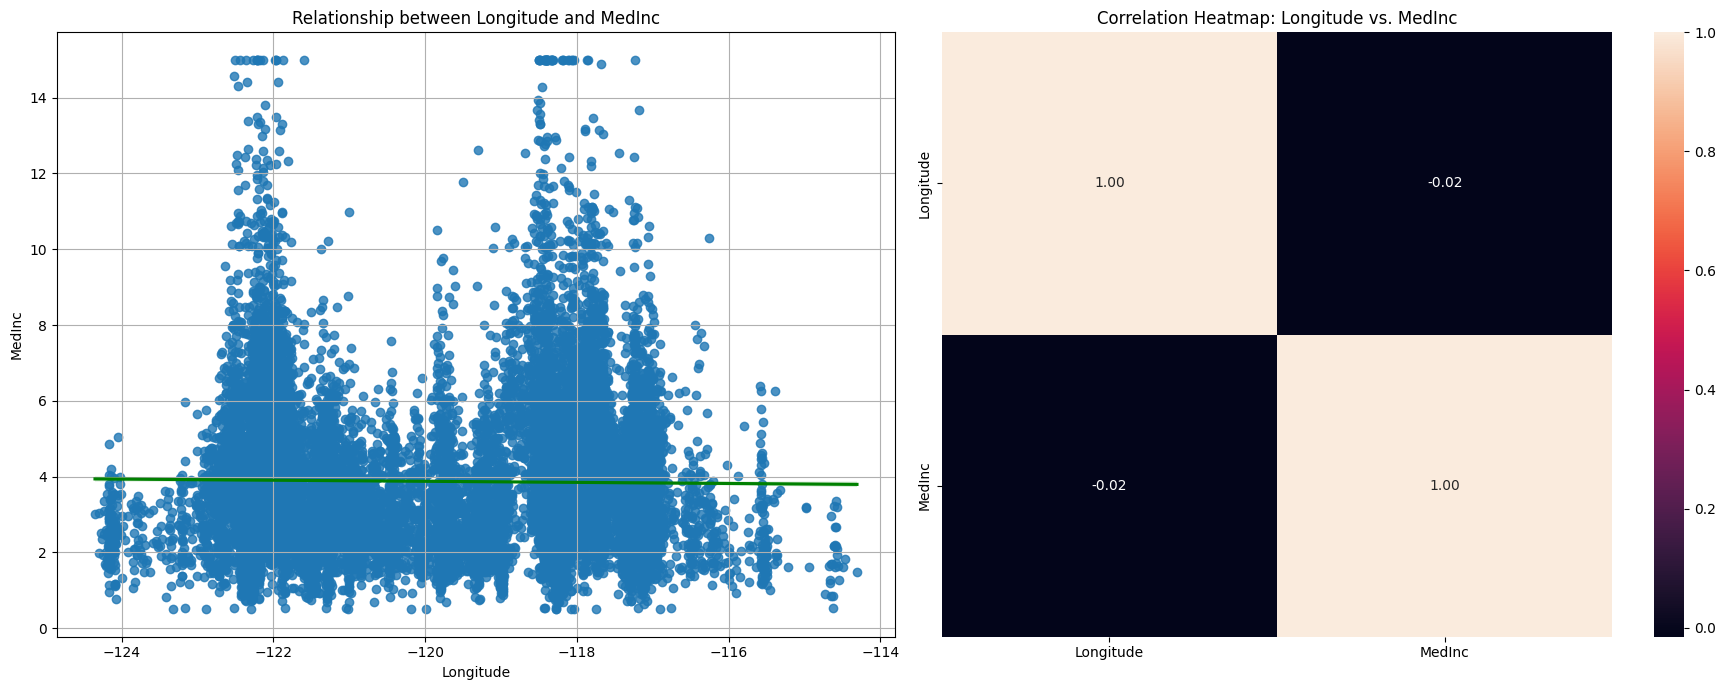

In [119]:
correlation_matrix_2_vars = clean_data[['Longitude', 'MedInc']].corr()
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- Subplot 1: regplot ---
sns.regplot(data=clean_data, x='Longitude', y='MedInc', ci=95, ax=axes[0], line_kws={'color': 'green'})
axes[0].set_title('Relationship between Longitude and MedInc')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('MedInc')
axes[0].grid(True)

# --- Subplot 2: heatmap ---
sns.heatmap(correlation_matrix_2_vars, annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Heatmap: Longitude vs. MedInc')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

### 5.2 Correlation Analysis <a id='c5-2'></a>

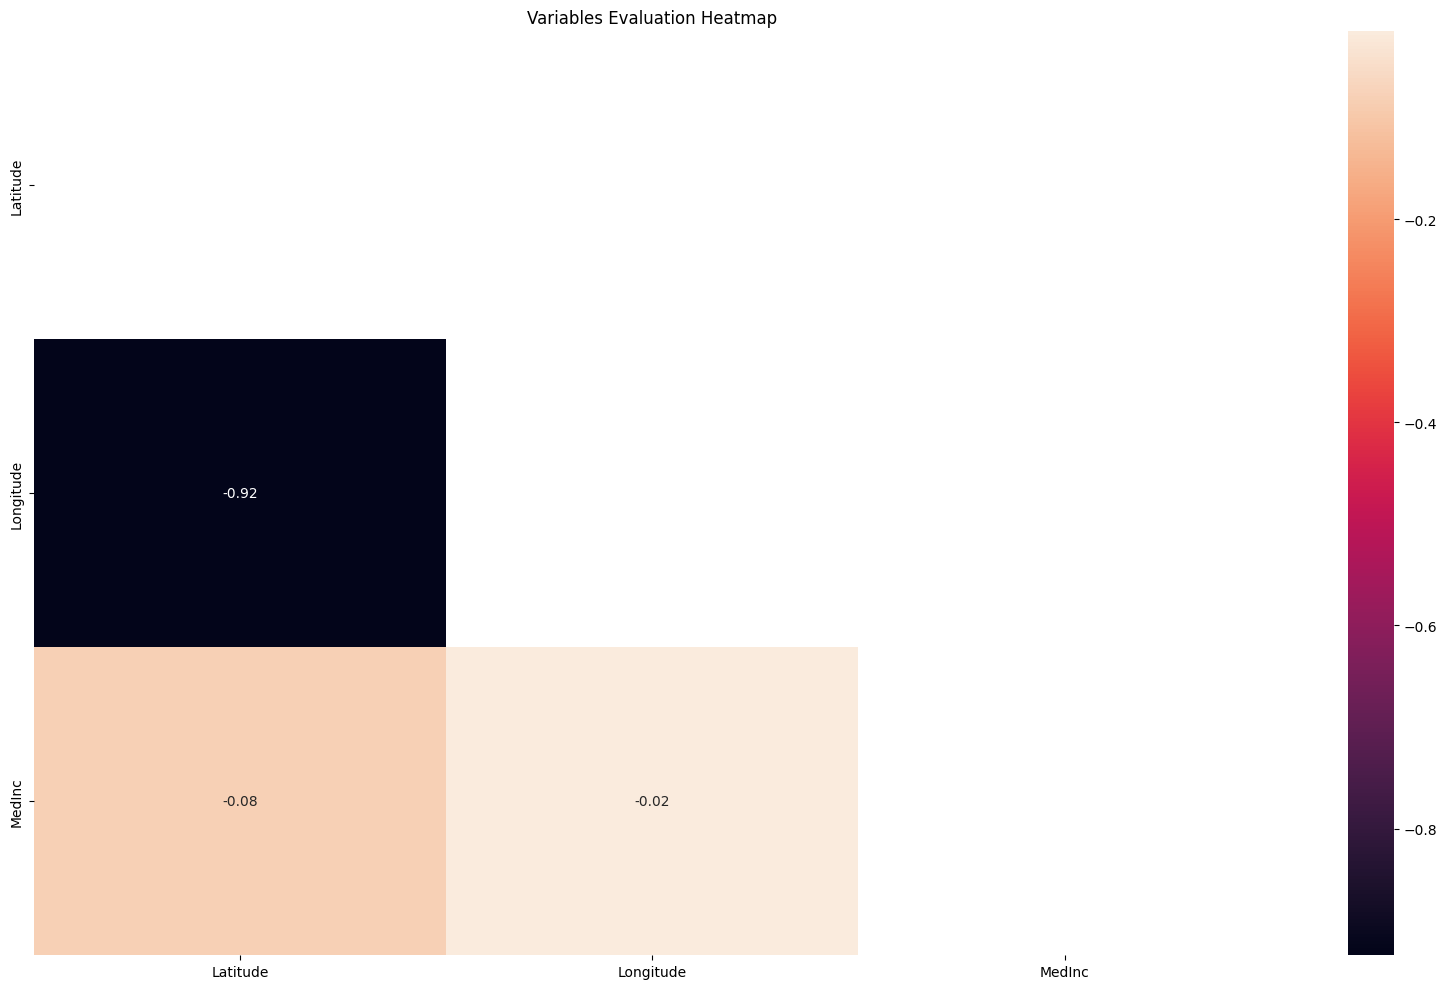

In [120]:
plt.figure(figsize=(16,10))
columns = clean_data.columns
sns.heatmap(clean_data[columns].corr(), annot = True, fmt = ".2f", mask=np.triu(clean_data[columns].corr()))
plt.title('Variables Evaluation Heatmap')
plt.tight_layout()
plt.show()

### 5.3 Pairplot Analysis <a id='c5-3'></a>

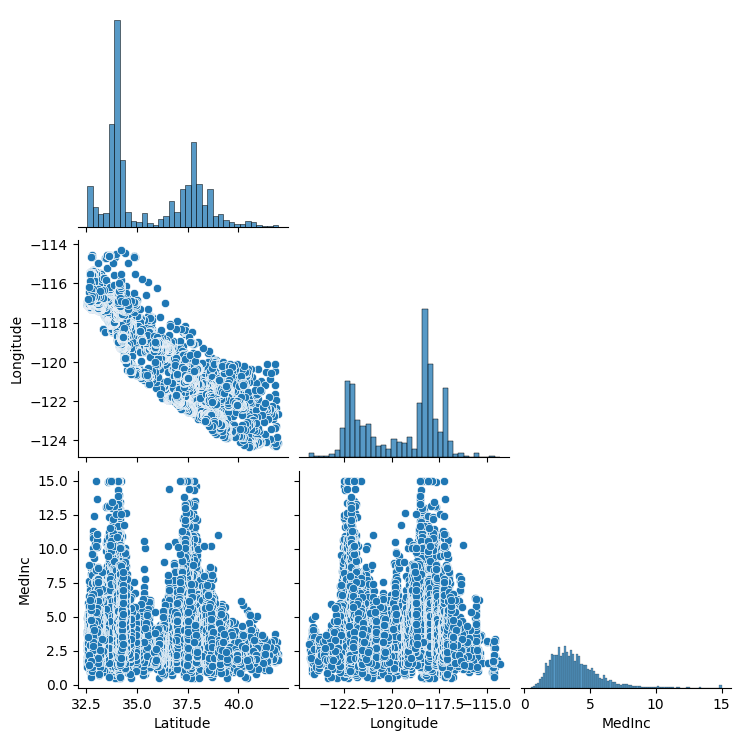

In [121]:
sns.pairplot(data = clean_data, corner=True)

## 6. Feature Engineering <a id='c6'></a>

### 6.1 Outliers Analysis <a id='c6-1'></a>

In [122]:
clean_data.describe().round(2)

,Latitude,Longitude,MedInc
count,20640.00,20640.00,20640.00
mean,35.63,-119.57,3.87
std,2.14,2.00,1.90
min,32.54,-124.35,0.50
25%,33.93,-121.80,2.56
50%,34.26,-118.49,3.53
75%,37.71,-118.01,4.74
max,41.95,-114.31,15.00


We have to remove outliers from all variables

In [123]:
clean_data_WITH_outliers = clean_data.copy()

clean_data_WITHOUT_outliers = clean_data.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: (x if (x <= upper_limit) else upper_limit) if not pd.isna(x) else np.nan)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: (x if (x >= lower_limit) else lower_limit) if not pd.isna(x) else np.nan)
  return df.copy(), {"lower_limit": lower_limit, "upper_limit": upper_limit}

outliers_dict = {}

output_dir = os.path.join('outliers_lims')
os.makedirs(output_dir, exist_ok=True)

for column in clean_data.columns:
  clean_data_WITHOUT_outliers, limit_list = replace_outliers_from_column(column, clean_data_WITHOUT_outliers)
  outliers_dict[column] = limit_list
  filename_outliers = f'./outliers_lims/{column}.json'
  with open(filename_outliers, "w") as f:
        json.dump(limit_list, f, indent=4)


Below we'll show the difference between both dataframes (with outliers and without outliers)

In [124]:
clean_data_WITH_outliers

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [125]:
clean_data_WITHOUT_outliers

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.013025
1,37.86,-122.22,8.013025
2,37.85,-122.24,7.257400
3,37.85,-122.25,5.643100
4,37.85,-122.25,3.846200
...,...,...,...
20635,39.48,-121.09,1.560300
20636,39.49,-121.21,2.556800
20637,39.43,-121.22,1.700000
20638,39.43,-121.32,1.867200


### 6.2 Missing Values Analysis <a id='c6-2'></a>

We don't have any missing values in this dataset, so we don't need to do anything.

In [126]:
clean_data_WITH_outliers.isnull().sum().sort_values(ascending=False)

Latitude     0
Longitude    0
MedInc       0
dtype: int64

### 6.3 Split train/test of both Data Frames <a id='c6-3'></a>

A crucial step in data preparation is splitting the dataset into training (train) and testing (test) sets. This is vital for two main reasons:

- **Prevent Overfitting**: It ensures the model learns generalizable patterns from the train set rather than simply memorizing noise or specific training examples.

- **Evaluate Generalization**: By assessing performance on the unseen test set, we gain a realistic estimate of how well the model will perform on new, real-world data.

In [127]:
def split_kmeans(df: pd.DataFrame, reference: str, test_size=0.2, random_state=123):
    X_train, X_test = train_test_split(df, test_size=test_size, random_state=random_state)

    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)

    output_dir = os.path.join('../data/processed')
    os.makedirs(output_dir, exist_ok=True)

    X_train.to_excel(os.path.join(output_dir, f'X_train_{reference}.xlsx'), index=False)
    X_test.to_excel(os.path.join(output_dir, f'X_test_{reference}.xlsx'), index=False)

    return X_train, X_test

In [128]:
X_train_with_outliers, X_test_with_outliers = split_kmeans(clean_data_WITH_outliers, 'with_outliers')
X_train_without_outliers, X_test_without_outliers = split_kmeans(clean_data_WITHOUT_outliers, 'without_outliers')

try:
    X_train_with_outliers = pd.read_excel('../data/processed/X_train_with_outliers.xlsx')
    X_train_without_outliers = pd.read_excel('../data/processed/X_train_without_outliers.xlsx')
    X_test_with_outliers = pd.read_excel('../data/processed/X_test_with_outliers.xlsx')
    X_test_without_outliers = pd.read_excel('../data/processed/X_test_without_outliers.xlsx')

    print("All .xlsx files have been read successfully.")

except FileNotFoundError:
    print("Error: Not all pre-processed data files were found.")
except Exception as e:
    print("Unexpected error:", e)

All .xlsx files have been read successfully.


## 7. Data Processing <a id='c7'></a>

### 7.1 Normalization <a id='c7-1'></a>

We'll proceede to normalize and save both dataframes with and without outliers

In [129]:
def norm(X_train:pd.DataFrame, X_test:pd.DataFrame, reference:str):
    scaler = StandardScaler()
    scaler.fit(X_train)

    scaler_filename = os.path.join('../models', f'scaler_{reference}.pkl')
    with open(scaler_filename, "wb") as file:
        pickle.dump(scaler, file)

    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
    X_train_norm.to_excel(f'../data/processed/X_train_{reference}_norm.xlsx', index=False)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)
    X_test_norm.to_excel(f'../data/processed/X_test_{reference}_norm.xlsx', index=False)

    return X_train_norm, X_test_norm

X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

X_train_without_outliers_norm.head()

try:
    X_train_with_outliers_norm = pd.read_excel('../data/processed/X_train_with_outliers_norm.xlsx')
    X_train_without_outliers_norm = pd.read_excel('../data/processed/X_train_without_outliers_norm.xlsx')

    X_test_with_outliers_norm = pd.read_excel('../data/processed/X_test_with_outliers_norm.xlsx')
    X_test_without_outliers_norm = pd.read_excel('../data/processed/X_test_without_outliers_norm.xlsx')

    print("All .xlsx variables readed successfully")

except FileNotFoundError:
    print("Error: Not all preprocessed data files were found..")
except Exception as e:
    print("Unexpected error: ", e)

All .xlsx variables readed successfully


### 7.2 Minmax Scalation <a id='c7-2'></a>

In [130]:
def minmax(X_train:pd.DataFrame, X_test:pd.DataFrame, reference:str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)

    scaler_filename = os.path.join('../models', f'scaler_{reference}.pkl')
    with open(scaler_filename, "wb") as file:
        pickle.dump(scaler, file)

    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)
    X_train_minmax.to_excel(f'../data/processed/X_train_{reference}_minmax.xlsx', index=False)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    X_test_minmax.to_excel(f'../data/processed/X_test_{reference}_minmax.xlsx', index=False)

    return X_train_minmax, X_test_minmax

X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

X_train_without_outliers_minmax.head()

try:
    X_train_with_outliers_minmax = pd.read_excel('../data/processed/X_train_with_outliers_minmax.xlsx')
    X_train_without_outliers_minmax = pd.read_excel('../data/processed/X_train_without_outliers_minmax.xlsx')

    X_test_with_outliers_minmax = pd.read_excel('../data/processed/X_test_with_outliers_minmax.xlsx')
    X_test_without_outliers_minmax = pd.read_excel('../data/processed/X_test_without_outliers_minmax.xlsx')

    print("All .xlsx variables readed successfully")

except FileNotFoundError:
    print("Error: Not all preprocessed data files were found..")
except Exception as e:
    print("Unexpected error: ", e)

All .xlsx variables readed successfully
